In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import  Dense, Reshape, Input
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten

import numpy as np
import matplotlib.pyplot as plt

In [19]:
# 생성자 모델
generator = Sequential()    # 모델 이름을 genergator로 정하고 Sequential() 함수를 호출
generator.add(Dense(128*7*7, input_dim=100))
generator.add(Activation(LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))


# 판별자 모델
discriminator = Sequential()    # 모델 이름을 discriminator로 정하고 Sequential() 함수를 호출
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28, 28, 1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable=False


# 생성자와 판별자 모델을 연결시키는 gan 모델 생성
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()


# 신경망을 실행시키는 함수 만들기
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터 불러오기
  # 앞서 불러온 MNIST를 다시 이용, 테스트 과정은 피러요없고 이미지만 사용할 것이기 때문에 X_train만 호출
  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온적 있는 MNIST를 다시 이용
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  
  # 127.5를 빼준 뒤 127.5로 나눠서 -1~1 사이의 값으로 바꿈
  X_train = (X_train - 127.5) / 127.5

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
    
    # 실제 데이터를 판별자에 입력
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs, true)

    # 가상 이미지를 판별자에 입력
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

    # 판별자와 생성자의 오차 계산
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    g_loss = gan.train_on_batch(noise, true)

    print('epoch : %d' % i, 'd_loss : %.4f' % d_loss, 'g_loss : %.4f' % g_loss)

    # 중간 과정을 이미지로 저장하는 부분, 정해진 인터벌만큼 학습되면 그때 만든 이미지를 gan_images 폴더에 저장하라는 뜻.
    if i % saving_interval == 0 :
      
      # r, c = 5, 5
      noise = np.random.normal(0, 1, (25, 100))
      gen_imgs = generator.predict(noise)

      # Rescale images 0 - 1
      gen_imgs = 0.5 * gen_imgs + 0.5

      fig, axs = plt.subplots(5, 5)
      count = 0
      
      for j in range(5):
        for k in range(5):
          axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
          axs[j, k].axis('off')
          count += 1
          fig.savefig('/content/drive/MyDrive/Colab Notebooks/gan_images/gan_mnist_%d.png' % i)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_15 (Sequential)  (None, 28, 28, 1)         865281    
                                                                 
 sequential_16 (Sequential)  (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 208ms/step
epoch : 1508 d_loss : 0.4422 g_loss : 1.9394
1/1 [==============================] - 0s 86ms/step
epoch : 1509 d_loss : 0.5501 g_loss : 1.7209
1/1 [==============================] - 0s 118ms/step
epoch : 1510 d_loss : 0.4533 g_loss : 1.5985
1/1 [==============================] - 0s 111ms/step
epoch : 1511 d_loss : 0.3870 g_loss : 1.9081
1/1 [==============================] - 0s 105ms/step
epoch : 1512 d_loss : 0.4994 g_loss : 1.6887
1/1 [==============================] - 0s 96ms/step
epoch : 1513 d_loss : 0.5176 g_loss : 1.3515
1/1 [==============================] - 0s 96ms/step
epoch : 1514 d_loss : 0.3966 g_loss : 1.7770
1/1 [==============================] - 0s 113ms/step
epoch : 1515 d_loss : 0.5512 g_loss : 1.6053
1/1 [==============================] - 0s 94ms/step
epoch : 1516 d_loss : 0.4999 g_loss : 1.6869
1/1 [==============================] - 0s 111ms/step
epoch : 1517 d_loss : 0.5553 g_lo

<ipython-input-19-9621e5302830>:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(5, 5)


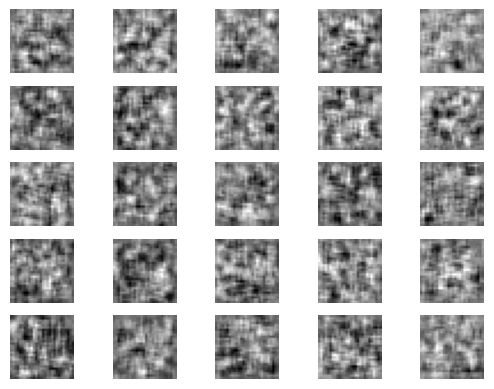

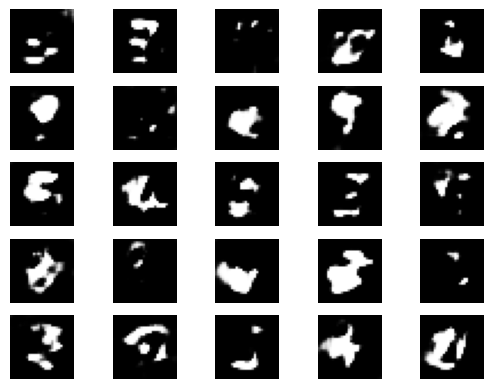

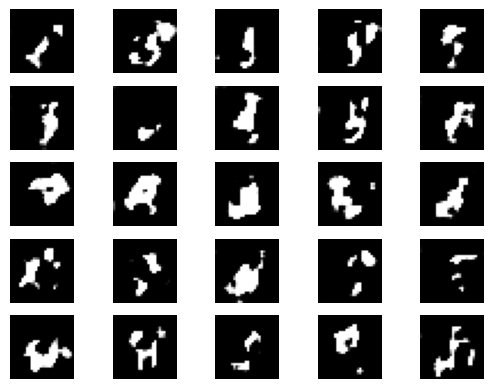

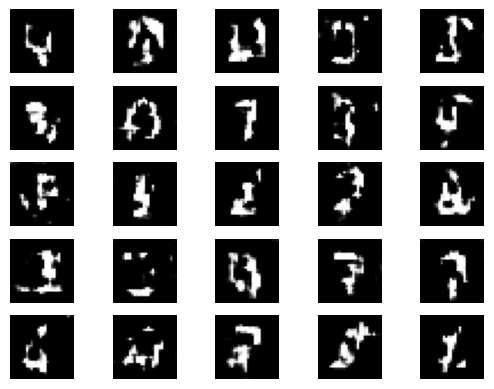

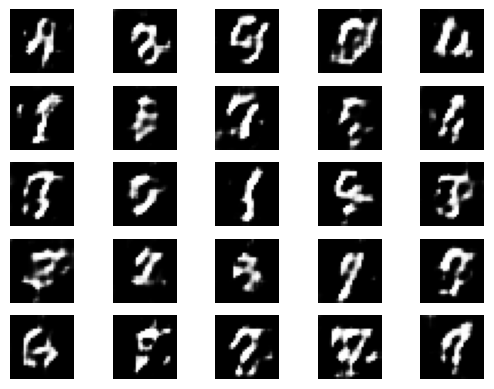

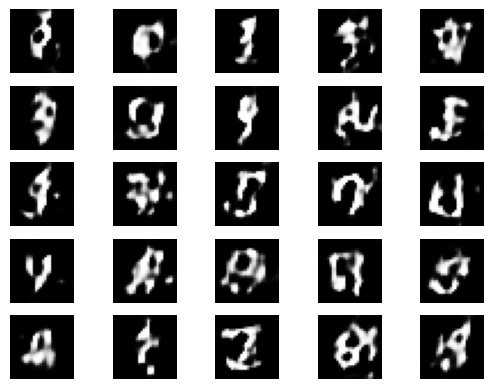

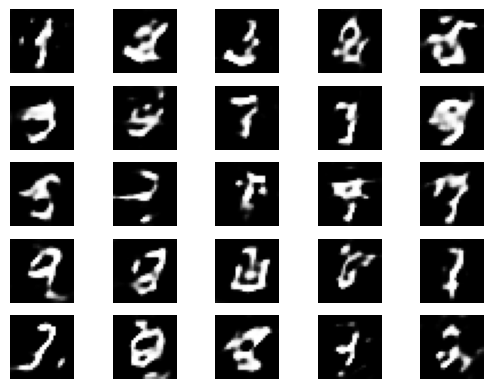

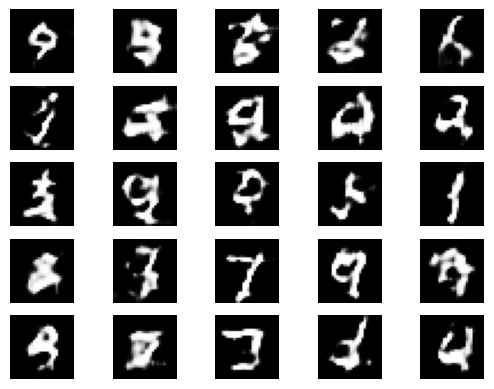

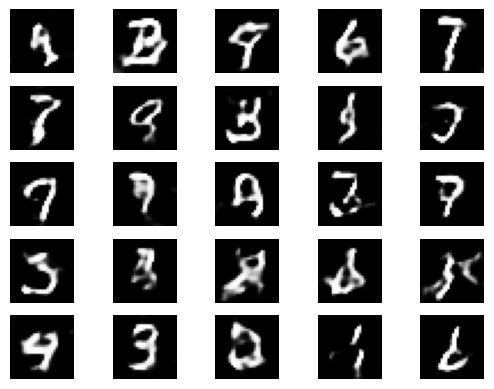

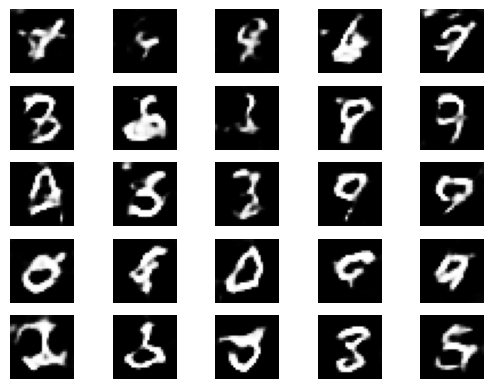

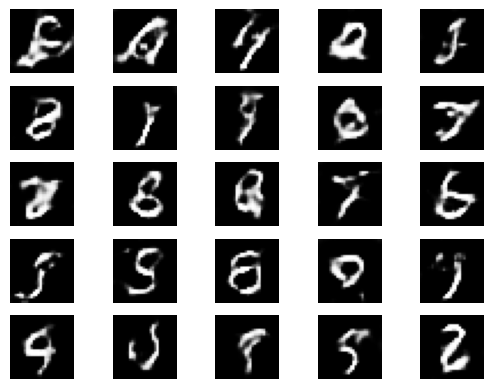

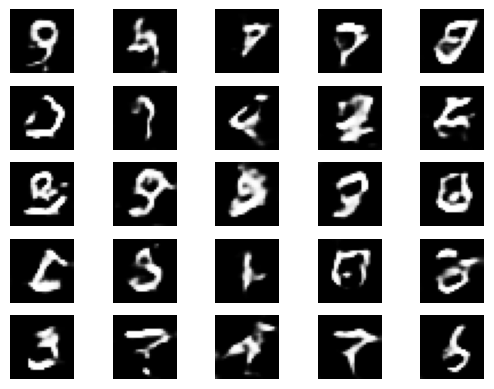

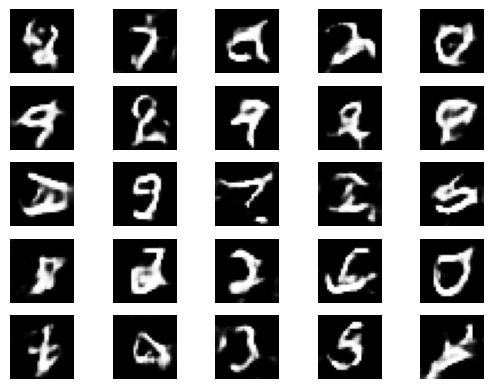

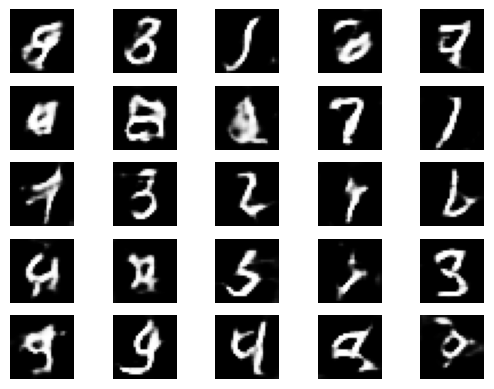

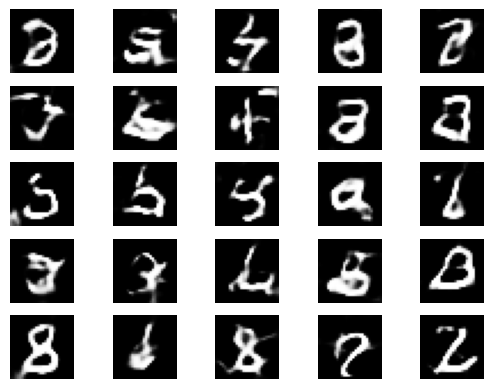

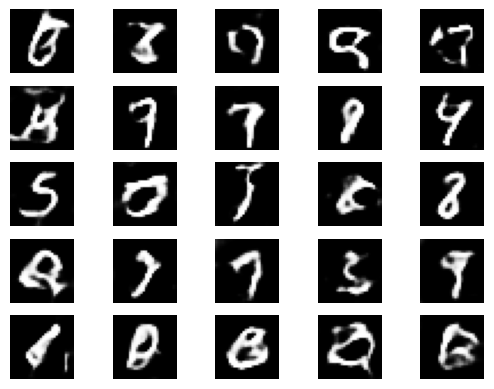

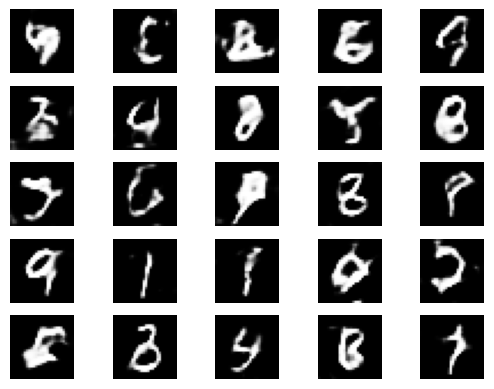

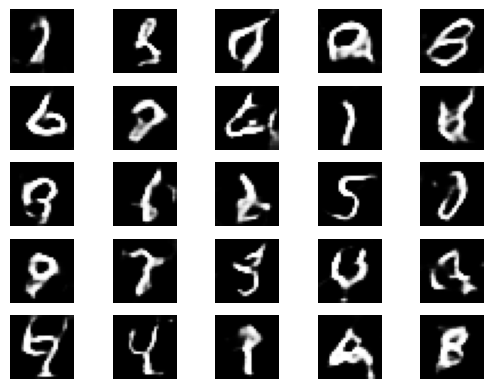

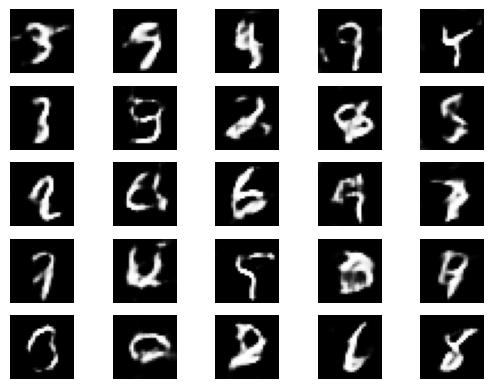

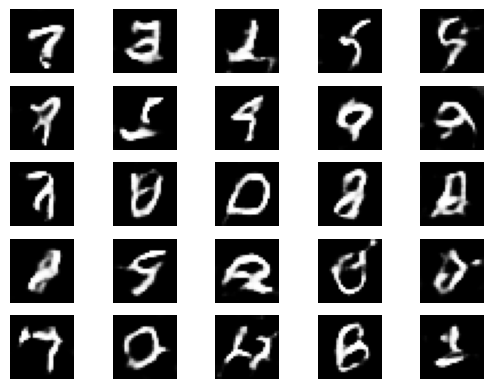

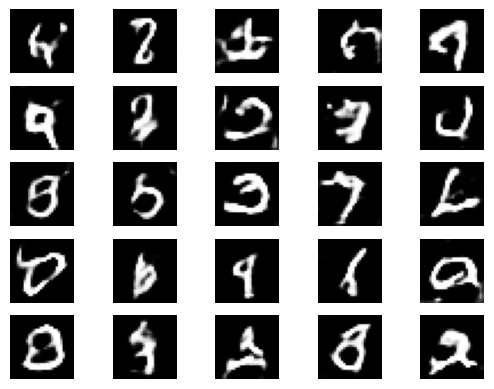

In [20]:
gan_train(4001, 32, 200)